In [83]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.io import fits
import numpy as np



In [84]:
bias_day1 = []
for i in range(1,11):
    bias_day1.append(fits.getdata("/Users/mmessere/Desktop/lsa-ast361/Work/mmessere/lab4/day1data/Bias-"+"0"*(4-len(str(i)))+str(i)+".fit", ext=0).astype(np.int))
    
avg_bias_day1 = np.array(bias_day1).mean(axis = 0)   

#print(bias_day1)

In [85]:
flats_62 = []
for i in range(1,11):
    flats_62.append(fits.getdata("/Users/mmessere/Desktop/lsa-ast361/Work/mmessere/lab4/day1data/Flats-62-"+"0"*(4-len(str(i)))+str(i)+".fit", ext=0).astype(np.int))

new_flat_62 = flats_62 - avg_bias_day1
    
avg_flats_62 = np.array(new_flat_62).mean() 

AvgOfVar_flats_62 = np.array(new_flat_62).var(axis = 0).mean()

#print(avg_flats_62)

In [86]:
flats_170 = []
for i in range(1,11):
    flats_170.append(fits.getdata("/Users/mmessere/Desktop/lsa-ast361/Work/mmessere/lab4/day1data/Flats-170-"+"0"*(4-len(str(i)))+str(i)+".fit", ext=0).astype(np.int))

new_flat_170 = flats_170 - avg_bias_day1
    
avg_flats_170 = np.array(new_flat_170).mean()  

AvgOfVar_flats_170 = np.array(new_flat_170).var(axis = 0).mean()

#print(avg_flats_170)

In [87]:
flats_255 = []
for i in range(1,11):
    flats_255.append(fits.getdata("/Users/mmessere/Desktop/lsa-ast361/Work/mmessere/lab4/day1data/Flats-255-"+"0"*(4-len(str(i)))+str(i)+".fit", ext=0).astype(np.int))
    
new_flat_255 = flats_255 - avg_bias_day1    
    
avg_flats_255 = np.array(new_flat_255).mean() 

AvgOfVar_flats_255 = np.array(new_flat_255).var(axis = 0).mean()

#print(avg_flats_255)

m=2.359262388147734, b=-1589.98932305992


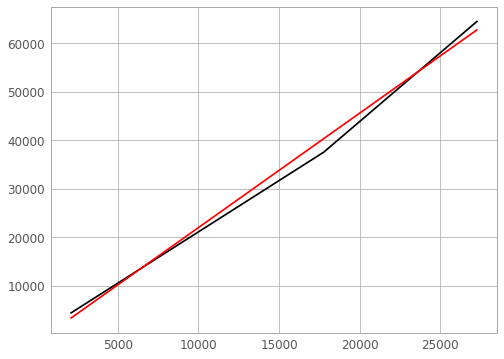

The gain =  0.4238612903014589


In [95]:
# import the curve fitting module and standard imports
from scipy.optimize import curve_fit 

x = np.array([avg_flats_62,avg_flats_170,avg_flats_255])
y = np.array([AvgOfVar_flats_62,AvgOfVar_flats_170,AvgOfVar_flats_255])

#plt.plot(x,y,'-r')

(m0,b0) = (.5,0)

def func0 (x,m,b,):
    return m*x + b

# exectute the curve fit...
coeffs, fiterr = curve_fit(func0, x, y, p0=(m0,b0))

# ...and plot the results
print ("m=%s, b=%s" % (coeffs[0], coeffs[1]))
plt.plot(x,y, 'k-')
plt.plot(x,func0(x,coeffs[0],coeffs[1]),'r-')
plt.show()# import the curve fitting module and standard imports
from scipy.optimize import curve_fit 

print("The gain = ", 1/coeffs[0])

## Day 2

In [99]:
dark_current9 = []

dark_current9.append(fits.getdata("/Users/mmessere/Desktop/lsa-ast361/Work/mmessere/lab4/day2data/Dark_Day_2_9c-0001.fit", ext=0).astype(np.int))

In [108]:
dark_current6 = []

dark_current6.append(fits.getdata("/Users/mmessere/Desktop/lsa-ast361/Work/mmessere/lab4/day2data/Dark_Day_2_6c-0001.fit", ext=0).astype(np.int))

In [109]:
bias_day2 = []
for i in range(1,41):
    bias_day2.append(fits.getdata("/Users/mmessere/Desktop/lsa-ast361/Work/mmessere/lab4/day2data/Bias_Day_2-"+"0"*(4-len(str(i)))+str(i)+".fit", ext=0).astype(np.int))
    
avg_bias_day2 = np.array(bias_day2).mean(axis = 0)   

In [110]:
new_dark9 = dark_current9 - avg_bias_day2
new_dark6 = dark_current6 - avg_bias_day2

In [111]:
Avgdark9 = np.array(new_dark9).mean() /300
Avgdark6 = np.array(new_dark6).mean() /900

print(Avgdark9)
print(Avgdark6)

0.269941161489782
0.2047005718891466


In [ ]:
T = ([9.1,5.5])
D = ([0.269941161489782,0.2047005718891466])

k = 8.617*10**-5


Dark Current (e-/sec) = AT​3/2​exp(-E​g​/2kT)

In [89]:
bias[0].std()

IndexError: list index out of range

In [ ]:
(bias[0] - bias[1]).std()

In [ ]:
avbias = sum(bias)/9

In [ ]:
avbias.std()

In [ ]:
half_sec = []
for i in range(1,10):
    half_sec.append(fits.getdata("half_sec.0000000{}.fit".format(i) , ext=0).astype(np.int))

In [ ]:
half_sub_bias = [half - avbias for half in half_sec]

In [ ]:
half_sub_bias[0].mean()

In [ ]:
half_sub_bias[0].std()

In [ ]:
print(half_sub_bias[1].mean())
print(half_sub_bias[1].std())

In [ ]:
halfav = sum(half_sub_bias)/9

In [ ]:
eight = []
for i in range(1,10):
    eight.append(fits.getdata("eight.0000000{}.fit".format(i) , ext=0).astype(np.int))

In [ ]:
eightbs = [ei - avbias for ei in eight]

In [ ]:
print(eightbs[0].mean())
print(eightbs[0].std())